In [1]:
import astrometry
import itertools    
from astropy.io import fits
import sep
import numpy as np
import time
import logging

In [5]:
from matplotlib import pyplot as plt
from astropy.visualization import AsinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
def plot_sources(data, sources, thresh):
    positions = np.transpose((sources['x'], sources['y']))
    apertures = CircularAperture(positions, r=15.0)
    norm = ImageNormalize(stretch=AsinhStretch())
    fig = plt.figure(figsize=(10, 8))
    plt.imshow(data, cmap='Greys', origin='lower', norm=norm,
               interpolation='nearest')
    apertures.plot(color='blue', lw=1.5, alpha=0.5);
    plt.title(f"Sources found with thresh={thresh}")
    plt.show()

In [6]:
file_path = "/Users/siyu/Downloads/data/20231028/_2023-10-28T08-36-51_r_-79.25_300.0s_0077.fits"
hdul = fits.open(file_path)
data = hdul[0].data
data = data.astype(np.float32)

# Estimate the background and subtract it from the image
bkg = sep.Background(data)
signal = data - bkg

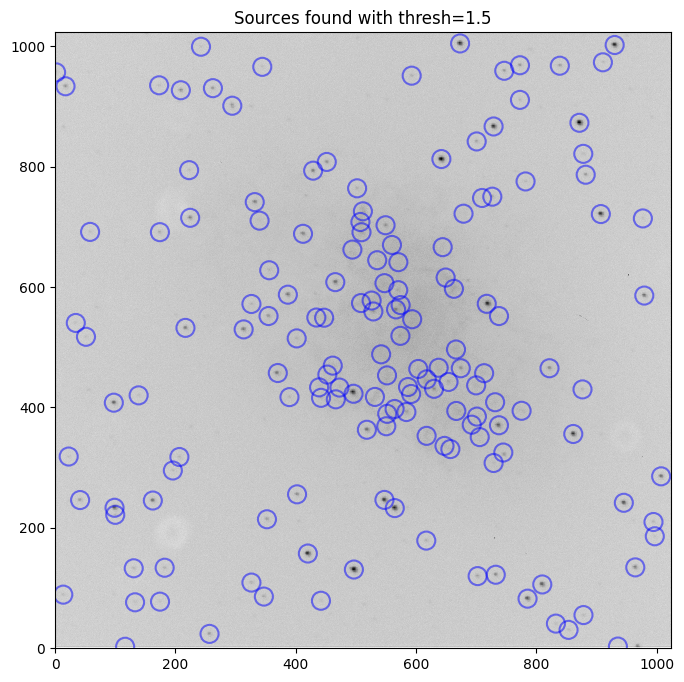

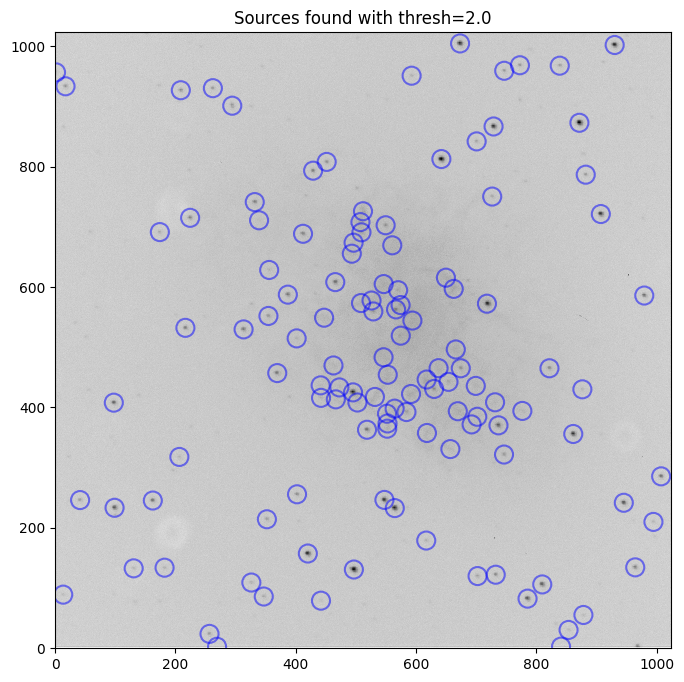

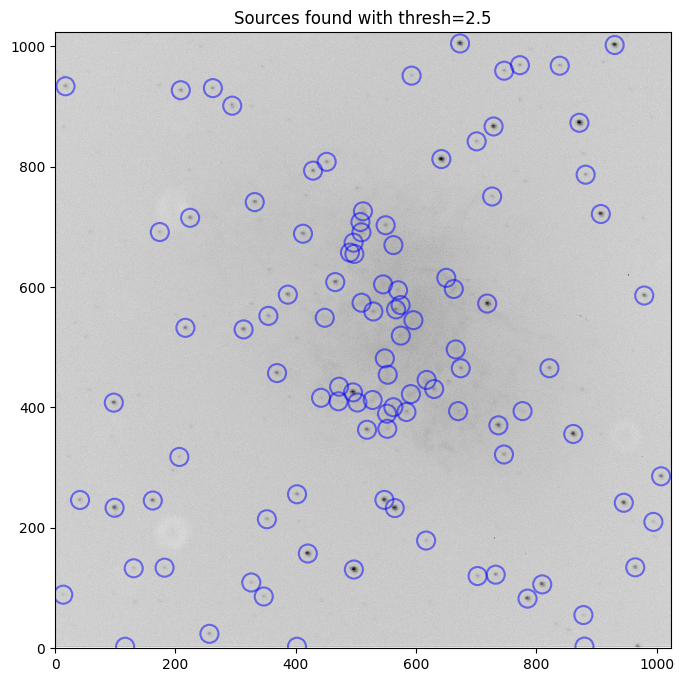

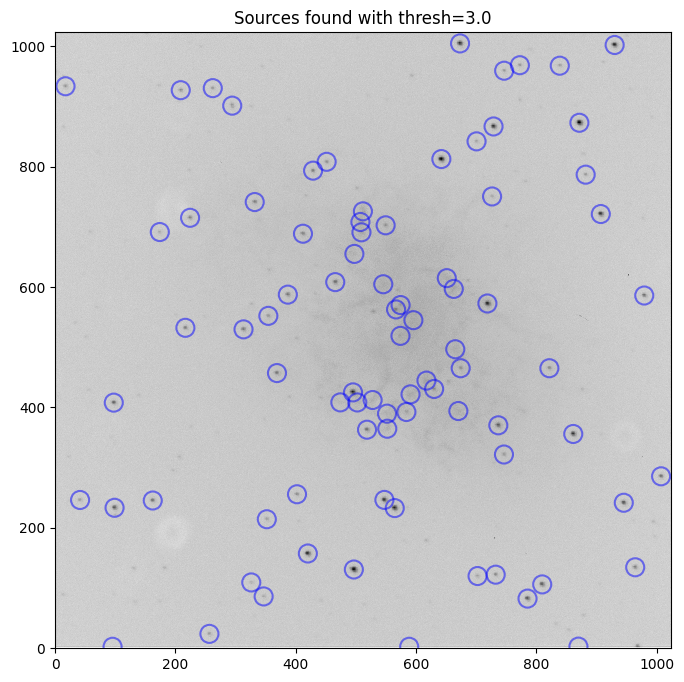

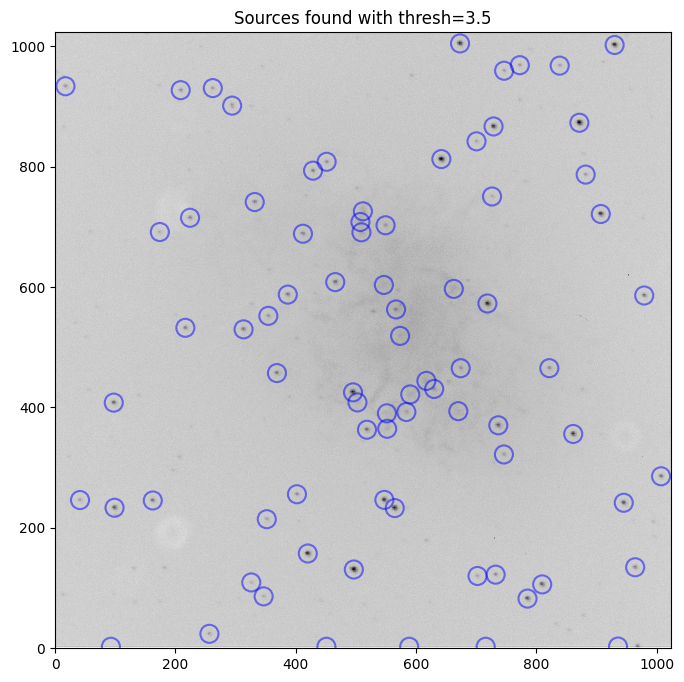

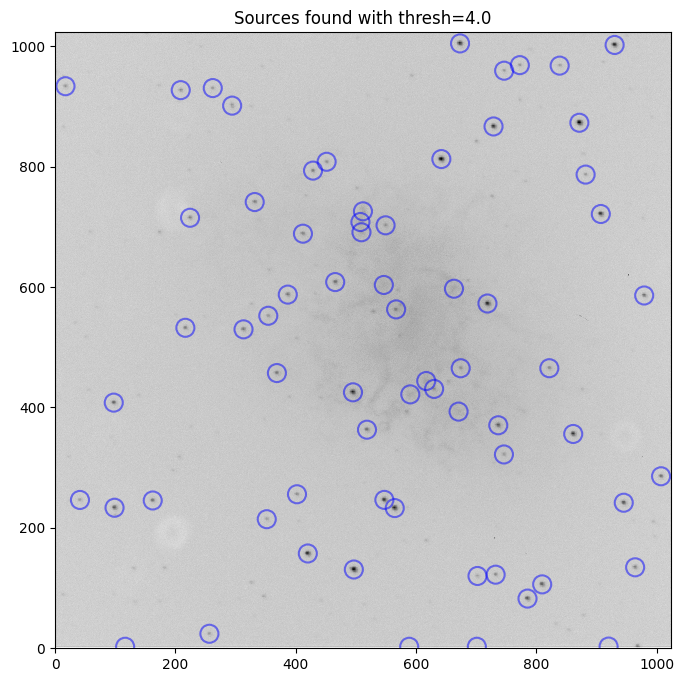

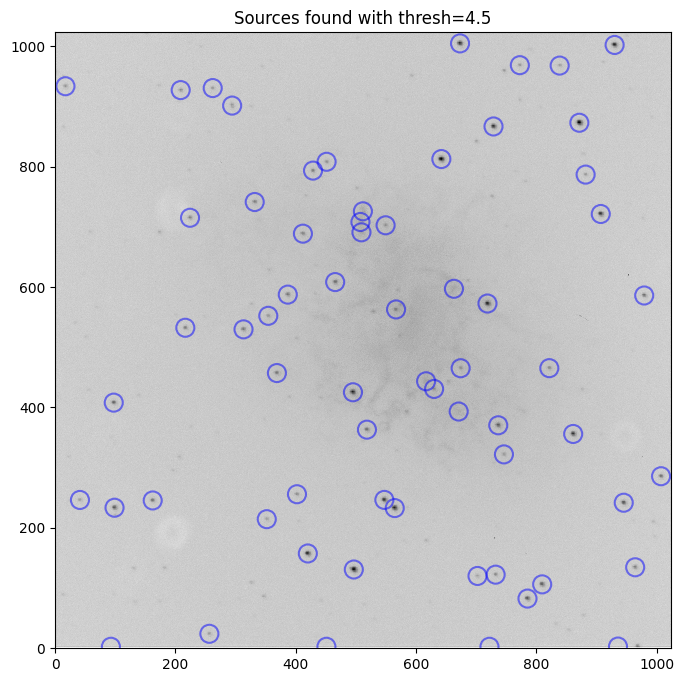

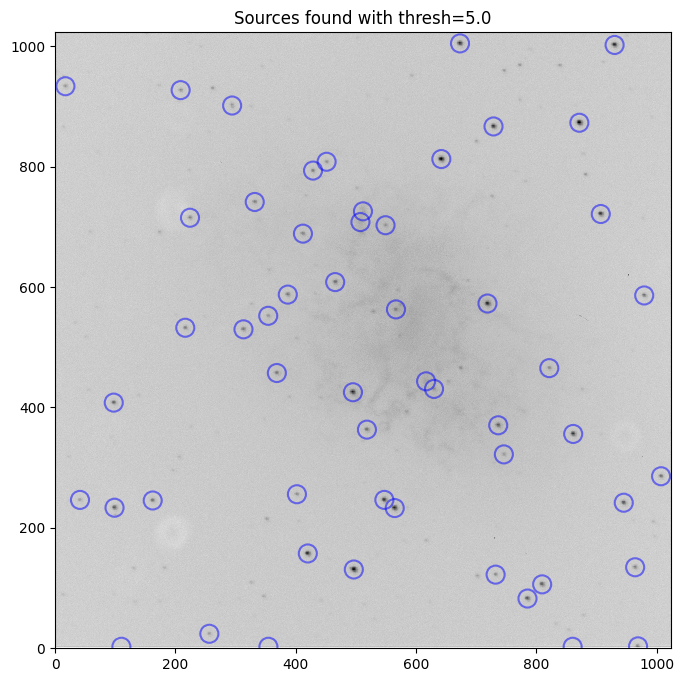

In [7]:
for thresh in np.arange(1.5, 5.5, 0.5):
    sources = sep.extract(signal, thresh=thresh, err=bkg.globalrms, minarea=40)
    logging.info(f"Number of sources found with thresh={thresh}: {len(sources)}")
    plot_sources(data, sources, thresh)
